In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Read in here

In [ ]:
#df_ultra_mega_frame

In [204]:
df_ultra_mega_frame = pd.read_csv('../1)DATA/df_ultra_mega_frame2.csv')

In [205]:
df_ultra_mega_frame['date'] = pd.to_datetime(df_ultra_mega_frame['date'],infer_datetime_format=True)
df_ultra_mega_frame.index = df_ultra_mega_frame['date']

In [206]:
df_ultra_mega_frame['neg_count'] = df_ultra_mega_frame['neg_count']*(-1)
df_ultra_mega_frame['neg_count'] = df_ultra_mega_frame['neg_count'] - df_ultra_mega_frame['neg_count'].min()

what this does is it flips the negative count to a negative number, then subtracts the minimum, (result: basically adds a positive number) 

In [207]:
df_ultra_mega_frame['count'] = df_ultra_mega_frame['neg_count'] + df_ultra_mega_frame['pos_count']
df_ultra_mega_frame.index = df_ultra_mega_frame['date']

In [208]:
df_ultra_mega_frame.head()

,date,SearchFrequency,DJI,price_btc,price_eth,sentiment,pos_count,neg_count,count
date,,,,,,,,,
2017-11-16,2017-11-16,55,23458.359375,7871.69,330.92,0.089579,14,75,89
2017-11-17,2017-11-17,75,23358.240234,7708.99,332.39,0.087821,8,59,67
2017-11-18,2017-11-18,103,23358.240234,7790.15,347.61,0.092867,5,82,87
2017-11-19,2017-11-19,65,23358.240234,8036.49,354.39,0.092423,3,78,81
2017-11-20,2017-11-20,96,23430.330078,8200.64,366.73,0.093611,7,80,87


### EDA
everything is loaded in so now we look at some EDA

In [209]:
#lets normalize all our data to properly see:

a = df_ultra_mega_frame['price_btc'] - df_ultra_mega_frame['price_btc'].min()
b = df_ultra_mega_frame['price_eth'] - df_ultra_mega_frame['price_eth'].min()
c = df_ultra_mega_frame['sentiment'] - df_ultra_mega_frame['sentiment'].min()
d = df_ultra_mega_frame['DJI'] - df_ultra_mega_frame['DJI'].min()
e = df_ultra_mega_frame['count'] - df_ultra_mega_frame['count'].min() 
f = df_ultra_mega_frame['SearchFrequency'] - df_ultra_mega_frame['SearchFrequency'].min()

#df_ultra_mega_frame
norm_btc = a/a.max()
norm_eth = b/b.max()
norm_sent = c/c.max()
norm_dji = d/d.max()
norm_count = e/e.max()
norm_search = f/f.max()

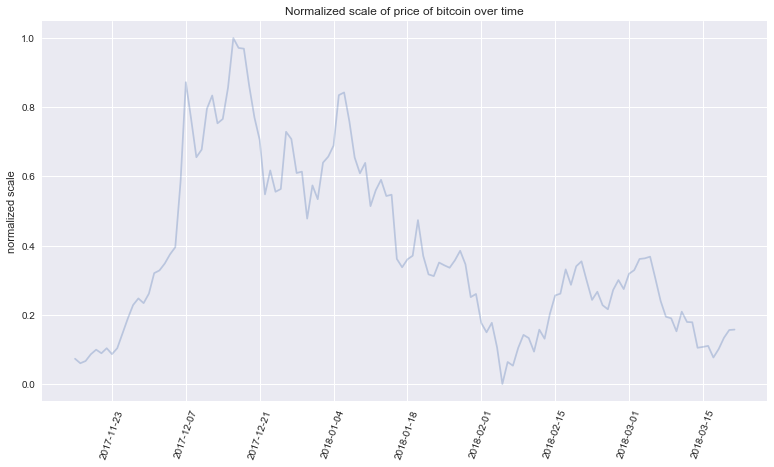

In [210]:
plt.figure(figsize=(13, 7))

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot(norm_btc, alpha = 0.3)
#plt.plot(norm_sent, alpha = 0.4)
#plt.plot(norm_eth, alpha = 0.8)
#plt.plot(norm_dji, alpha = 0.8)
# need to add legend
plt.title('Normalized scale of price of bitcoin over time')
plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.show()
#plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller subplot.


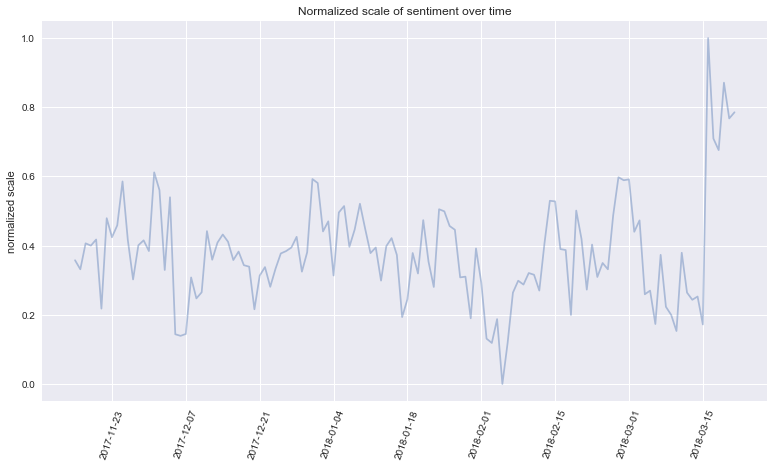

In [211]:
plt.figure(figsize=(13, 7))
plt.title('Normalized scale of sentiment over time')
#plt.plot(norm_btc, alpha = 0.3)
plt.plot(norm_sent, alpha = 0.4)
#plt.plot(norm_eth, alpha = 0.8)
#plt.plot(norm_dji, alpha = 0.8)
# need to add legend
plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.show()

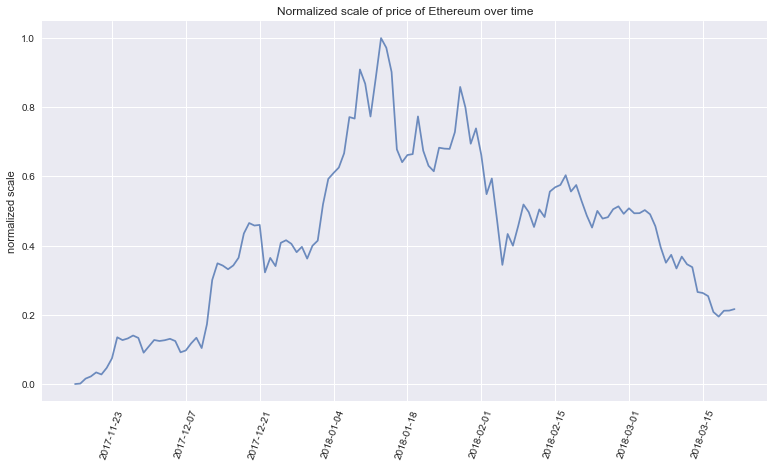

In [212]:
plt.figure(figsize=(13, 7))
plt.title('Normalized scale of price of Ethereum over time')
#plt.plot(norm_btc, alpha = 0.3)
#plt.plot(norm_sent, alpha = 0.4)
plt.plot(norm_eth, alpha = 0.8)
#plt.plot(norm_dji, alpha = 0.8)
# need to add legend
plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.show()

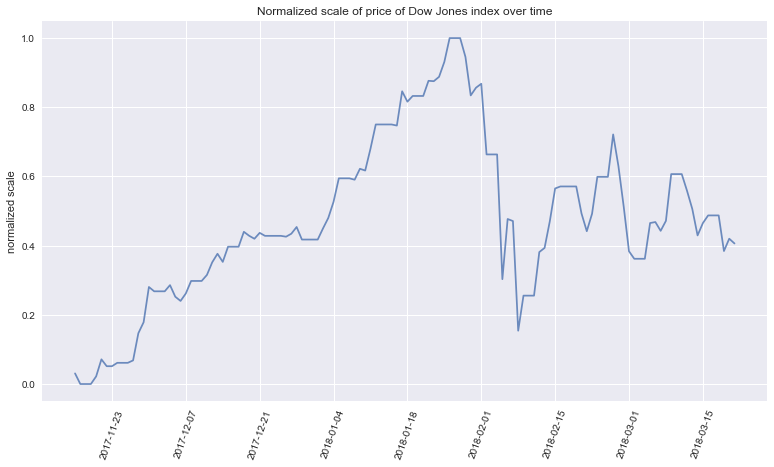

In [213]:
plt.figure(figsize=(13, 7))
plt.title('Normalized scale of price of Dow Jones index over time')
#plt.plot(norm_btc, alpha = 0.3)
#plt.plot(norm_sent, alpha = 0.4)
#plt.plot(norm_eth, alpha = 0.8)
plt.plot(norm_dji, alpha = 0.8)
# need to add legend
plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.show()

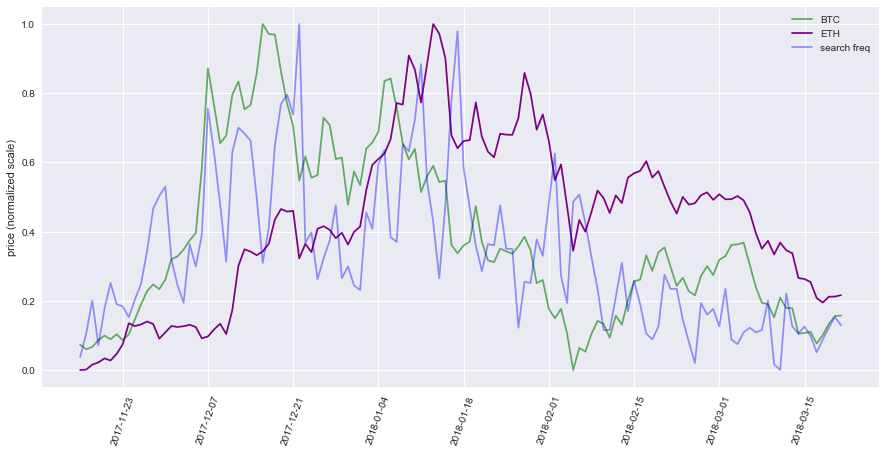

<Figure size 576x396 with 0 Axes>

In [214]:
#sns.set()
plt.figure(figsize=(15, 7))
line_btc = plt.plot(norm_btc, label='BTC', alpha = 0.6, color="green")
#line_sent = plt.plot(norm_sent, label='sentiment', alpha = 0.6, color="orange")
line_eth = plt.plot(norm_eth, label='ETH', alpha = 1,color="purple")
#line_dji = plt.plot(norm_dji, label='DJI', alpha = 1,color="red")
line_sf = plt.plot(norm_search, label='search freq', alpha = 0.4,color="blue")

plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)

plt.ylabel('price (normalized scale)')
plt.xticks(rotation=70)
plt.show()

fig = plt.figure()
fig.savefig('fig2.png')

### Insights:
From here we can see that ethereum and dow jonoes index have an extremley high correlation, more than bitcoin does with either of them, which is quite interesting and insightful! We always kind of knew that bitcoin and ethereum price have some co-integration (jus tby knowing when bitcoin falls, all others fall as well and when bitcoin rises usually others rise with it.) As well, this can be explicitly seen in the granger causuality test in the following directory from this current one '../4)Models/ArimaNotebooks'

In [215]:
df_ultra_mega_frame['neg_count'] = df_ultra_mega_frame['neg_count']*(-1)
df_ultra_mega_frame['count'] = df_ultra_mega_frame['neg_count'] + df_ultra_mega_frame['pos_count']

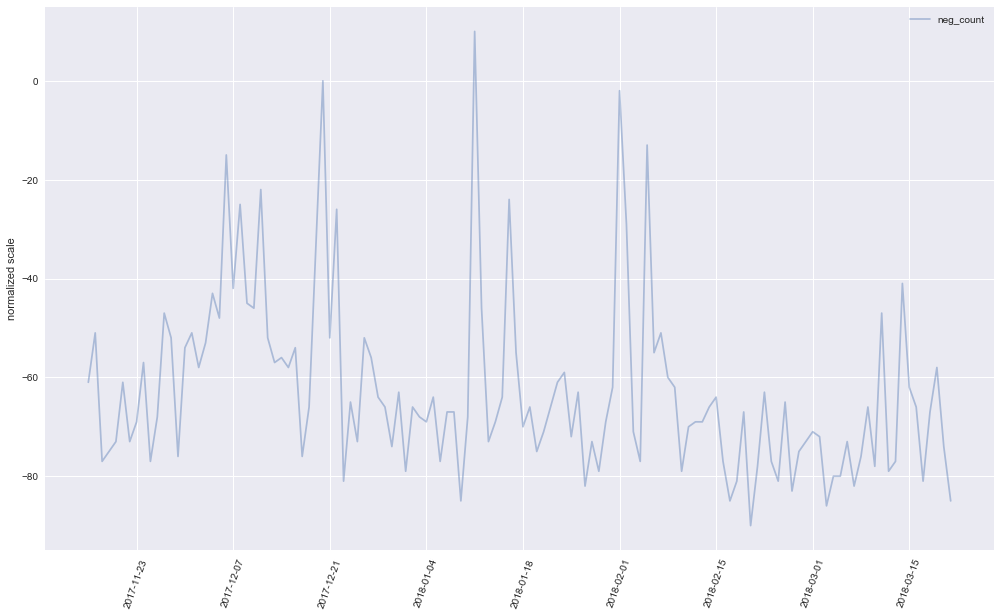

In [216]:
sns.set()
plt.figure(figsize=(17, 10))

#line_pos_count = plt.plot(df_ultra_mega_frame['pos_count'], label='pos_count', alpha = 0.3)
#line_neg_count = plt.plot(df_ultra_mega_frame['neg_count'], label='neg_count', alpha = 0.4)
line_count = plt.plot(df_ultra_mega_frame['count'], label='neg_count', alpha = 0.4)


plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)

plt.ylabel('normalized scale')
plt.xticks(rotation=70)
plt.show()


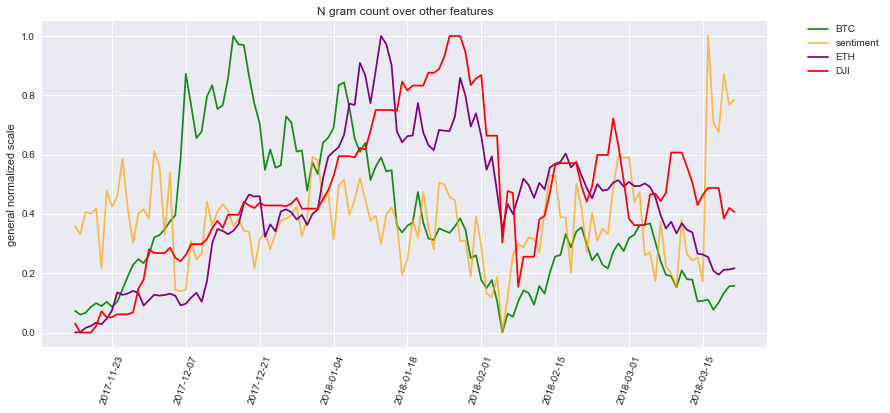

<Figure size 576x396 with 0 Axes>

In [220]:
#sns.set()
#plt.title('N gram count over other features')
plt.figure(figsize=(13, 6))
plt.title('N gram count over other features')

line_btc = plt.plot(norm_btc, label='BTC', alpha = 0.9, color="green")
line_sent = plt.plot(norm_sent, label='sentiment', alpha = 0.7, color="orange")
line_eth = plt.plot(norm_eth, label='ETH', alpha = 1,color="purple")
line_dji = plt.plot(norm_dji, label='DJI', alpha = 1,color="red")
#line_count = plt.plot(norm_count, label='count', alpha = 0.3,color="blue")
#WOW google trends were not even on here



#plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('general normalized scale')
plt.xticks(rotation=70)
plt.show()

fig = plt.figure()
fig.savefig('fig.png')

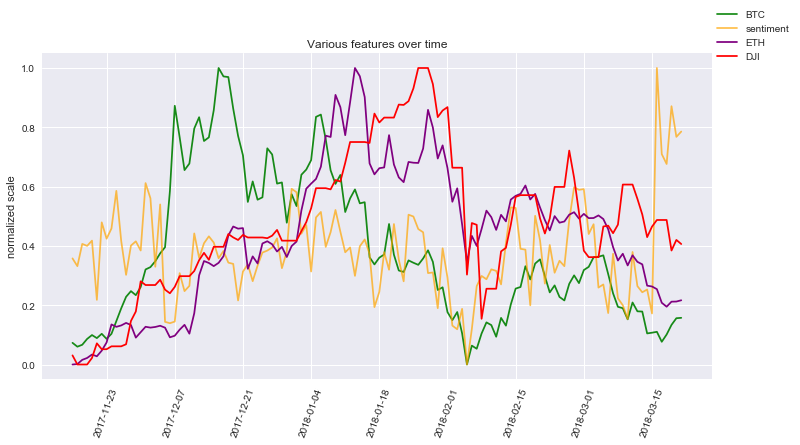

In [223]:
# DOING IT AGAIN WITH 

import matplotlib.pylab as plt
%matplotlib inline
import seaborn; seaborn.set()

#norm_btc2 = norm_btc2[200:]
#norm_eth2 = norm_eth2[200:]

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (12,6))

line_btc = plt.plot(norm_btc, label='BTC', alpha = 0.9, color="green")
line_sent = plt.plot(norm_sent, label='sentiment', alpha = 0.7, color="orange")
line_eth = plt.plot(norm_eth, label='ETH', alpha = 1,color="purple")
line_dji = plt.plot(norm_dji, label='DJI', alpha = 1,color="red")
#line_count = plt.plot(norm_count, label='count', alpha = 0.3,color="blue") #,marker = 'o', linestyle = 'None')
#plt.plot(norm_gg)
plt.title('Various features over time')
#beautiful, text itself is tick labels. the 3 is step
plt.legend(bbox_to_anchor=(1, 1),
         bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('normalized scale')
#step = 20
#ax.xaxis.set_ticklabels(norm_btc2.index.values[::step]) #.index as opposed to ['day']

#tick labels are the text that appear, need to be same size 
#so they know at every spot, what do i place?

#ax.xaxis.set_ticks(norm_btc2.index.values[::step]) #where i want labels to go
_ = plt.xticks(rotation = 70)

## to be looked at later: plotting over long periods of time

In [4]:
df3 = pd.read_csv('../1)DATA/google_trends/googletrends_bitcoin30.csv')
#df3['date'] = pd.to_datetime(df3['date'],infer_datetime_format=True)
#df3 = df3.sort_values('date')
#df3.index = df3['date']
#df3 = df3.sort_values('date')

In [5]:
df3.head()

,date,SearchFrequency
0,2016-01-03,1
1,2016-01-04,1
2,2016-01-05,1
3,2016-01-06,1
4,2016-01-07,1


In [6]:
def convert_date1(date_string):
    nums = date_string.split('-')
    alt_format = '{}-{}-{}'.format(nums[1], nums[2], nums[0])
    #alt_format = datetime.datetime(int(nums[2]), int(nums[0]), int(nums[1]), 0, 0)
    return alt_format

df3['date'] = df3['date'].apply(convert_date1)
df3['date'] = pd.to_datetime(df3['date'],infer_datetime_format=True)
searchfreq = df3['SearchFrequency']
#df3['date'] = pd.to_datetime(df3['date'])
df3.index = df3['date']

In [7]:
df3.head()

,date,SearchFrequency
date,,
2016-01-03,2016-01-03,1
2016-01-04,2016-01-04,1
2016-01-05,2016-01-05,1
2016-01-06,2016-01-06,1
2016-01-07,2016-01-07,1


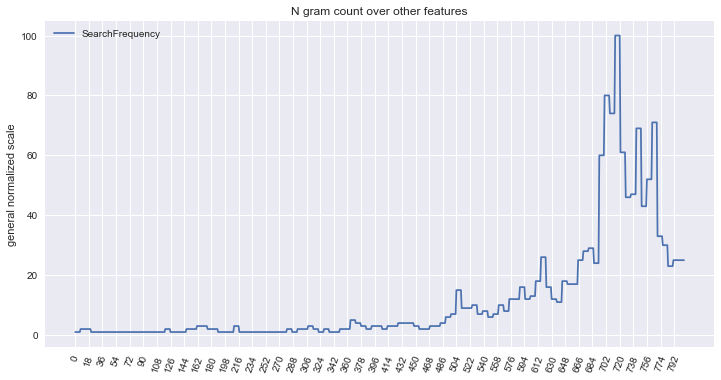

In [8]:
#----
import matplotlib.pylab as plt
%matplotlib inline
import seaborn; seaborn.set()

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (12,6))
plt.title('N gram count over other features')

plt.plot(searchfreq)
#plt.plot(norm_eth2) #,marker = 'o', linestyle = 'None')
#plt.plot(norm_gg)
plt.legend()
plt.ylabel('general normalized scale')

#beautiful, text itself is tick labels. the 3 is step
step = 18
ax.xaxis.set_ticklabels(searchfreq.index.values[::step]) #.index as opposed to ['day']
#tick labels are the text that appear, need to be same size 
#so they know at every spot, what do i place?
ax.xaxis.set_ticks(searchfreq.index.values[::step]) #where i want labels to go
_ = plt.xticks(rotation = 70)

# DJI long term modeling

In [9]:
df33 = pd.read_csv('../1)DATA/DJI_1_1_2016.csv')

In [10]:
df4 = pd.read_csv('../1)DATA/ETH_01-01-2016_26-05-2018.csv')
#df4['Date'] = pd.to_datetime(df4['Date'],infer_datetime_format=True)
#df4 = df4.sort_values('Date')

In [11]:
df5 = pd.read_csv('../1)DATA/BTC_01-01-2016_26-05-2018.csv')
#df5['Date'] = pd.to_datetime(df5['Date'],infer_datetime_format=True)
#df5 = df5.sort_values('Date')

In [12]:
def convert_date(date_string):
    nums = date_string.split('-')
    alt_format = '{}-{}-{}'.format(nums[1], nums[0], nums[2])
    #alt_format = datetime.datetime(int(nums[2]), int(nums[0]), int(nums[1]), 0, 0)
    return alt_format

In [13]:
#hello here

#df4['Date'] = df4['Date'].apply(convert_date)
#df5['Date'] = df5['Date'].apply(convert_date)

In [14]:
df4['Date'] = pd.to_datetime(df4['Date'],infer_datetime_format=True)
df4 = df4.sort_values('Date')

In [15]:
df4.index = df4['Date']

In [16]:
df5['Date'] = pd.to_datetime(df5['Date'],infer_datetime_format=True)
df5 = df5.sort_values('Date')

In [17]:
df33['Date']= pd.to_datetime(df33['Date'],infer_datetime_format=True)
df5 = df5.sort_values('Date')
df33.index = df33['Date']

In [18]:
df4['DJI'] = df33['Close']

In [19]:
#df4

In [20]:
df4['DJI']['2016-01-01'] = 17148.939453

/Users/Alexandra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
for index, item in enumerate(df4['DJI']):
    if np.isnan(item) == True:
        df4['DJI'].iloc[index] = df4['DJI'].iloc[index-1]

/Users/Alexandra/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
#df4

In [23]:
df4.index = df4['Date']
df5.index = df5['Date']

In [24]:
df4['ETH'] = df4['Close**']
df4['BTC'] = df5['Close**']

In [36]:
#len(df3)

In [37]:
df_final = df4.filter(['Date','DJI','ETH','BTC'])

In [38]:
df_final.head()

,Date,DJI,ETH,BTC
Date,,,,
2016-01-01,2016-01-01,17148.939453,0.948024,434.33
2016-01-02,2016-01-02,17148.939453,0.937124,433.44
2016-01-03,2016-01-03,17148.939453,0.971905,430.01
2016-01-04,2016-01-04,17148.939453,0.954480,433.09
2016-01-05,2016-01-05,17158.660156,0.950176,431.96


### Long term modeling

In [39]:
y = np.array(df_final['ETH'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df_final.drop(['Date','ETH'], axis = 1) #'pos_count','neg_count' 
# Saving feature names for later use
feature_list = list(features.columns) #this way we remeber the column names
# Convert to numpy array
X = np.array(features) #because once we convert to np array it drops the names

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
print("regr.feature_importances_ :")
print(regr.feature_importances_) #strength of importance of feature in the model

print(" ")
#but is using the other two because they are not zero!!!
print("regr.score(X_test, Y_test)")
print(regr.score(X_test, Y_test))

param_grid = {"criterion": ["mse", "mae"], #mean squared error and mean absolute error in documentation
              #"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "n_estimators":[50, 100, 200]
              #"min_samples_leaf": [20, 40, 100],
              #"max_leaf_nodes": [5, 20, 100, 500, 800],
              }

grid_cv_regr = GridSearchCV(regr, param_grid, cv=5)

grid_cv_regr.fit(X_train, Y_train) #features and labels
print(' ')
print('grid_cv_regr.score(X_test, Y_test)')
print(grid_cv_regr.score(X_test, Y_test)) #this is really great!!!

regr.feature_importances_ :
[ 0.72451468  0.27548532]
 
regr.score(X_test, Y_test)
0.932056962342
 
grid_cv_regr.score(X_test, Y_test)
0.975870949483


In [40]:
# Feature Scaling

df_scaled = df_final.copy(deep=True)

sc_x = StandardScaler()
df_scaled['BTC'] = sc_x.fit_transform(df_scaled['BTC'].values.reshape(-1,1))
df_scaled['ETH'] = sc_x.fit_transform(df_scaled['ETH'].values.reshape(-1,1))
#df_scaled['sentiment'] = sc_x.fit_transform(df_scaled['sentiment'].values.reshape(-1,1))
df_scaled['DJI'] = sc_x.fit_transform(df_scaled['DJI'].values.reshape(-1,1))
#df_scaled['SearchFrequency'] = sc_x.fit_transform(df_scaled['SearchFrequency'].values.reshape(-1,1))

In [46]:
y = np.array(df_scaled['ETH'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df_scaled.drop(['Date','ETH'], axis = 1) #'pos_count','neg_count' 
# Saving feature names for later use
feature_list = list(features.columns) #this way we remeber the column names
# Convert to numpy array
X = np.array(features)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
print('DJI and btc_price')
print(regr.feature_importances_) #strength of importance of feature in the model
#but is using the other two because they are not zero!!!
print("regr.score()")
print(regr.score(X_test, Y_test))

param_grid = {"criterion": ["mse", "mae"], #mean squared error and mean absolute error in documentation
              #"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "n_estimators":[50, 100, 200]
              #"min_samples_leaf": [20, 40, 100],
              #"max_leaf_nodes": [5, 20, 100, 500, 800],
              }

grid_cv_regr = GridSearchCV(regr, param_grid, cv=5)


grid_cv_regr.fit(X_train, Y_train) #features and labels
print('grid_cv_regr.score')
print(grid_cv_regr.score(X_test, Y_test)) #this is really great!!!

DJI and btc_price
[ 0.71347523  0.28652477]
regr.score()
0.931823826796
grid_cv_regr.score
0.975786981644


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [48]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
print(regr.feature_importances_) 

[ 0.71347523  0.28652477]


In [71]:
#print(regr.predict(X_test))

In [50]:
#now can compare with the original X and Y_train!!!
#using score 

regr.score(X_test, Y_test) #X_test , as seen above...X_test has more dimensions than the output on predict

0.93182382679567421

In [73]:
#use a grid search
param_grid = {"criterion": ["mse", "mae"], #mean squared error and mean absolute error in documentation
              #"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "n_estimators":[50, 100, 200]
              #"min_samples_leaf": [20, 40, 100],
              #"max_leaf_nodes": [5, 20, 100, 500, 800],
              }

grid_cv_regr = GridSearchCV(regr, param_grid, cv=5)

grid_cv_regr.fit(X_train, Y_train) #features and labels

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [74]:
grid_cv_regr.score(X_test, Y_test) #this is really great!!!

0.975786981643693

WOW 

#### OTHER STUFF

In [199]:
#df3

In [186]:
list_eth = df4['Close**']
list_btc = df5['Close**']
list_gg = df3['SearchFrequency']

In [187]:
len(list_gg) #others gotta copy ... ['2016-01-03':'2018-03-18']

806

In [188]:
list_eth = list_eth['2016-01-03':'2018-03-18']
list_btc = list_btc['2016-01-03':'2018-03-18']

In [198]:
#list_btc

In [190]:
a = list_btc - list_btc.min()

In [191]:
len(a/a.max())
#df_ultra_mega_frame
norm_btc2 = a/a.max()

from here

In [192]:
#a = list_btc - list_btc.min()
b = list_eth - list_eth.min()
c = list_gg - list_gg.min()

#df_ultra_mega_frame
#norm_btc2 = a/a.max()
norm_eth2 = b/b.max()
norm_gg =  c/c.max()


In [196]:
len(norm_btc2)

806

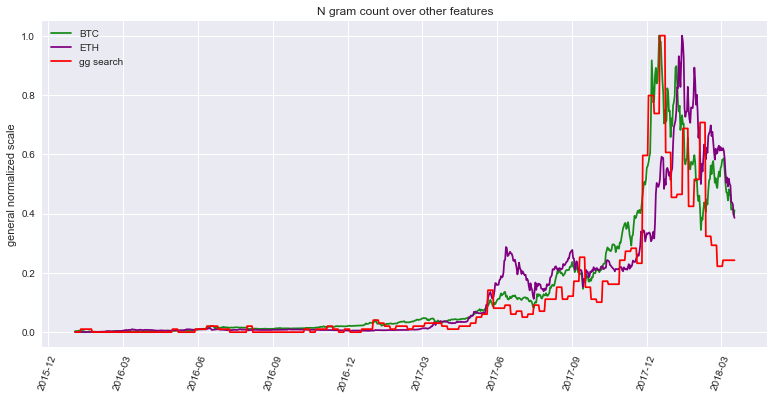

In [194]:
plt.figure(figsize=(13, 6))
plt.title('N gram count over other features')

line_btc1 = plt.plot(norm_btc2, label='BTC', alpha = 0.9, color="green")
line_eth2 = plt.plot(norm_eth2, label='ETH', alpha = 1,color="purple")
line_gg = plt.plot(norm_gg, label='gg search', alpha = 1,color="red")

#story_ggtrends_btc['date'] = pd.to_datetime(story_ggtrends_btc['date'],infer_datetime_format=True)

plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('general normalized scale')
plt.xticks(rotation=70)
plt.show()

#fig = plt.figure()
#fig.savefig('fig.png')

In [165]:
#norm_btc.index.values

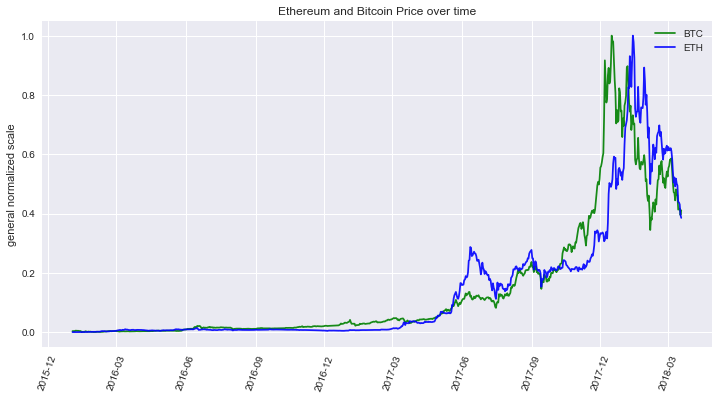

In [197]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn; seaborn.set()

#norm_btc2 = norm_btc2[200:]
#norm_eth2 = norm_eth2[200:]

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (12,6))

plt.plot(norm_btc2, label='BTC', alpha = 0.9, color="green")
plt.plot(norm_eth2, label='ETH', alpha = 0.9, color="blue") #,marker = 'o', linestyle = 'None')
#plt.plot(norm_gg)
plt.title('Ethereum and Bitcoin Price over time')
#beautiful, text itself is tick labels. the 3 is step
plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('general normalized scale')
#step = 20
#ax.xaxis.set_ticklabels(norm_btc2.index.values[::step]) #.index as opposed to ['day']

#tick labels are the text that appear, need to be same size 
#so they know at every spot, what do i place?

#ax.xaxis.set_ticks(norm_btc2.index.values[::step]) #where i want labels to go
_ = plt.xticks(rotation = 70)

OK WOW JUST GET RID OF EVERYTHING AND GET IT TO WORK OUT

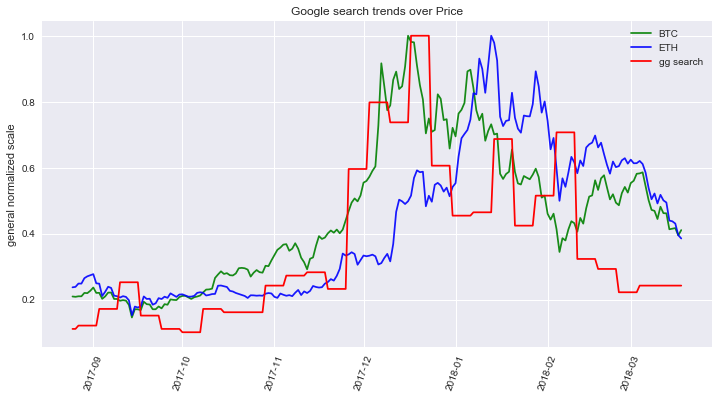

In [173]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn; seaborn.set()

#norm_btc2 = norm_btc2[100:]
#norm_eth2 = norm_eth2[100:]
#norm_gg = norm_gg[100:]

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (12,6))

plt.plot(norm_btc2, label='BTC', alpha = 0.9, color="green")
plt.plot(norm_eth2, label='ETH', alpha = 0.9, color="blue") #,marker = 'o', linestyle = 'None')
plt.plot(norm_gg, label='gg search', alpha = 1,color="red")
#plt.plot(norm_gg)
plt.title('Google search trends over Price')
#beautiful, text itself is tick labels. the 3 is step
plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('general normalized scale')
#step = 20
#ax.xaxis.set_ticklabels(norm_btc2.index.values[::step]) #.index as opposed to ['day']

#tick labels are the text that appear, need to be same size 
#so they know at every spot, what do i place?

#ax.xaxis.set_ticks(norm_btc2.index.values[::step]) #where i want labels to go
_ = plt.xticks(rotation = 70)

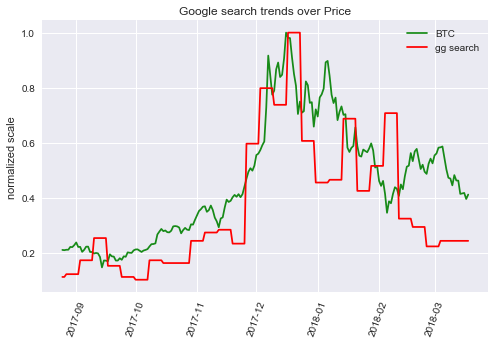

In [182]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn; seaborn.set()

#norm_btc2 = norm_btc2[100:]
#norm_eth2 = norm_eth2[100:]
#norm_gg = norm_gg[100:]

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (8,5))

plt.plot(norm_btc2, label='BTC', alpha = 0.9, color="green")
#plt.plot(norm_eth2, label='ETH', alpha = 0.9, color="blue") #,marker = 'o', linestyle = 'None')
plt.plot(norm_gg, label='gg search', alpha = 1,color="red")
#plt.plot(norm_gg)
plt.title('Google search trends over Price')
#beautiful, text itself is tick labels. the 3 is step
plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('normalized scale')
#step = 20
#ax.xaxis.set_ticklabels(norm_btc2.index.values[::step]) #.index as opposed to ['day']

#tick labels are the text that appear, need to be same size 
#so they know at every spot, what do i place?

#ax.xaxis.set_ticks(norm_btc2.index.values[::step]) #where i want labels to go
_ = plt.xticks(rotation = 70)

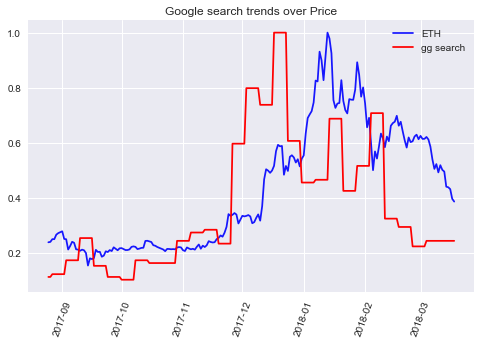

In [183]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn; seaborn.set()

#norm_btc2 = norm_btc2[100:]
#norm_eth2 = norm_eth2[100:]
#norm_gg = norm_gg[100:]

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize = (8,5))

#plt.plot(norm_btc2, label='BTC', alpha = 0.9, color="green")
plt.plot(norm_eth2, label='ETH', alpha = 0.9, color="blue") #,marker = 'o', linestyle = 'None')
plt.plot(norm_gg, label='gg search', alpha = 1,color="red")
#plt.plot(norm_gg)
plt.title('Google search trends over Price')
#beautiful, text itself is tick labels. the 3 is step
plt.legend() #bbox_to_anchor=(1, 1),
 #         bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.ylabel('normalized scale')
#step = 20
#ax.xaxis.set_ticklabels(norm_btc2.index.values[::step]) #.index as opposed to ['day']

#tick labels are the text that appear, need to be same size 
#so they know at every spot, what do i place?

#ax.xaxis.set_ticks(norm_btc2.index.values[::step]) #where i want labels to go
_ = plt.xticks(rotation = 70)